In [1]:
# To support both python 2 and python 3
# 让这份笔记同步支持 python 2 和 python 3
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 3.1 Simple Linear Regression

**3.1.1 Estimating the Coefficients**

In [3]:
Advertising = pd.read_csv("data/Advertising.csv")
Advertising.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


**利用statsmodels进行获得线性模型普通最小二乘回归**

In [4]:
y = Advertising['sales']

In [5]:
X = Advertising['TV']

In [6]:
X_model = sm.add_constant(X)

c:\users\wujiaxu\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [7]:
model = sm.OLS(y, X_model)

In [8]:
results = model.fit()

In [9]:
t0,t1 = results.params

In [10]:
t0,t1

(7.032593549127695, 0.047536640433019736)

**FIGURE 3.1.(statsmodels)**

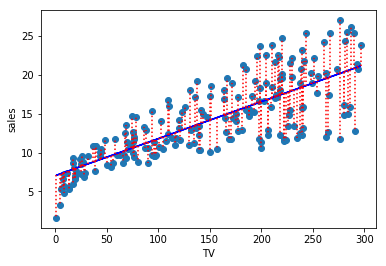

In [11]:
#利用statsmodels模型生成图标3-1
plt.scatter(X, y)
plt.plot(X, t0 + t1*X, "b")
plt.plot([X, X],[t0 + t1*X,y],"r:")
plt.xlabel(u"TV")
plt.ylabel(u"sales")
plt.show()

In [12]:
#对于statsmodels大部分情况下使用statsmodels的公式API（smf）和Patsy的公式字符串更简单，比较如下（后面全部采用smf和Patsy）：
results = smf.ols('sales ~ TV',data = Advertising).fit()
t0,t1 = results.params
t0,t1

(7.032593549127695, 0.047536640433019736)

**利用scikit-learn进行获得线性模型普通最小二乘回归**

In [13]:
from sklearn import linear_model
lin1 = linear_model.LinearRegression()

In [14]:
lin1.fit(np.c_[X], np.c_[y])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
p0,p1 = lin1.intercept_[0], lin1.coef_[0][0]

In [16]:
p0,p1

(7.032593549127695, 0.04753664043301975)

**FIGURE 3.1.(sklearn)**

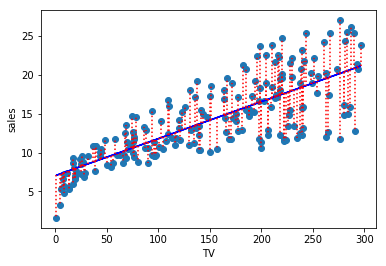

In [17]:
#利用sklearn模型生成图标3-1
plt.scatter(X, y)
plt.plot(X, p0 + p1*X, "b")
plt.plot([X, X],[p0 + p1*X,y],"r:")
plt.xlabel(u"TV")
plt.ylabel(u"sales")
plt.show()

**3.1.2 Assessing the Accuracy of the Coefficient Estimates**

In [18]:
from sklearn.preprocessing import StandardScaler
scaler_mean = StandardScaler(with_mean=True,with_std =False)
scaler_mean.fit(np.c_[X])
X_scale = scaler_mean.transform(np.c_[X])
lin_scale = linear_model.LinearRegression()
lin_scale.fit(np.c_[X_scale],np.c_[y])
p0_scale,p1_scale = lin_scale.intercept_[0], lin_scale.coef_[0][0]
beta_0_scale = np.linspace(p0_scale - 3,p0_scale + 3,50)
beta_1_scale = np.linspace(p1_scale - 0.03,p1_scale + 0.03,50)
Z = np.empty((beta_0_scale.size,beta_1_scale.size))
belta_0_scale, belta_1_scale = np.meshgrid(beta_0_scale, beta_1_scale)
for (i,j),v  in np.ndenumerate(Z):
    Z[i,j] =(np.square(y - (belta_0_scale[i,j]+X_scale.ravel()* belta_1_scale[i,j]))).sum()/1000
    
beta_0 = np.linspace(p0 - 3,p0 + 3,50)
beta_1 = np.linspace(p1 - 0.03,p1 + 0.03,50)
belta_0, belta_1 = np.meshgrid(beta_0, beta_1)

**FIGURE 3.2**

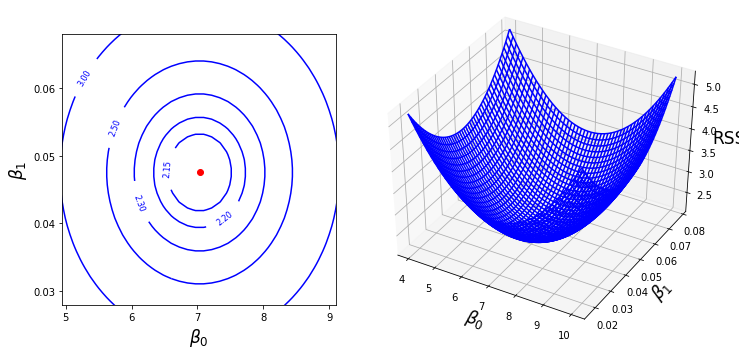

In [19]:
from matplotlib.gridspec import GridSpec
from mpl_toolkits import mplot3d
fig = plt.figure(figsize = (12,6))
gs = GridSpec(12, 12) 
#左图
ax1 = fig.add_subplot(gs[1:11, :5])
cs = ax1.contour(belta_0, belta_1, Z ,  levels=[2.15, 2.2, 2.3, 2.5, 3],colors = 'b')
ax1.scatter(p0,p1,c = 'red')
ax1.clabel(cs, inline=1, fontsize=8,fmt = '%1.2f')
ax1.set_xlim(4.95,9.1)
ax1.set_ylim(0.028,0.068)
ax1.set_xticks(np.linspace(5,9,5))
ax1.set_yticks(np.linspace(0.03,0.06,4))
ax1.set_xlabel(r'$\beta_0$', fontsize=17)
ax1.set_ylabel(r'$\beta_1$', fontsize=17)
#右图
ax2 = fig.add_subplot(gs[:, 5:], projection='3d')
ax2.plot_wireframe(belta_0, belta_1, Z ,color = 'b')
ax2.view_init(40)
ax2.set_xlabel(r'$\beta_0$', fontsize=17)
ax2.set_ylabel(r'$\beta_1$', fontsize=17)
ax2.set_zlabel('RSS', fontsize=17)
plt.show()

In [20]:
np.random.seed(427)
X_random = []
y_random = []
for i in range(100):
    X_random.append(-2 + 4*np.random.rand(100))
    y_random.append(2 + 3 * X_random[i] + np.random.normal(0,10,100))

**FIGURE 3.3**

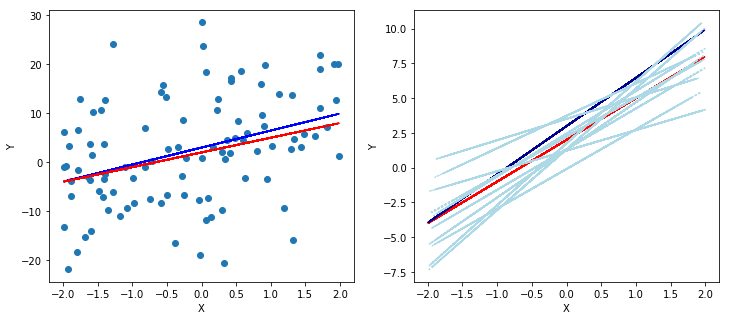

In [21]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
lin2 = linear_model.LinearRegression()
lin2.fit(np.c_[X_random[0]],np.c_[y_random[0]])
p0_random,p1_random = lin2.intercept_[0], lin2.coef_[0][0]
plt.scatter(X_random[0], y_random[0])
plt.plot(X_random[0], p0_random + p1_random*X_random[0], "b")
plt.plot(X_random[0], 2 + 3*X_random[0], "r")
plt.xlabel(u"X")
plt.ylabel(u"Y")
plt.subplot(1,2,2)
plt.plot(X_random[0], 2 + 3*X_random[0], "r")
plt.plot(X_random[0], p0_random + p1_random*X_random[0], "darkblue")
for i in range(1,11):
    lin2 = linear_model.LinearRegression()
    lin2.fit(np.c_[X_random[i]],np.c_[y_random[i]])
    p0_random,p1_random = lin2.intercept_[0], lin2.coef_[0][0]
    plt.plot(X_random[i], p0_random + p1_random*X_random[i], "lightblue",linestyle=':')
plt.xlabel(u"X")
plt.ylabel(u"Y")
plt.show()

**TABLE 3.1(statsmodels)**

In [22]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 20 Dec 2019   Prob (F-statistic):           1.47e-42
Time:                        14:30:32   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**TABLE 3.1(scikit-learn)**

In [23]:
#对应表3.1的系数，scikit-learn可直接获取
lin1.intercept_[0], lin1.coef_[0][0]

(7.032593549127695, 0.04753664043301975)

In [24]:
from sklearn.metrics import mean_squared_error
y_predictions = lin1.predict(np.c_[X])
lin_mse = mean_squared_error(np.c_[y], np.c_[y_predictions])
lin_mse

10.512652915656757

**以下对应于RSE =（RSS/(n − 2)）^0.5即 residual standard error残差标准误，区别于MSE（the mean squared error 均方误差），
scikit-learn可直接获取MSE,但RSE需根据公式计算获取**

In [25]:
lin_rse = ((np.c_[y_predictions] - np.c_[y])**2).sum()/(len(y)-2)
lin_rse

10.618841328946218

In [26]:
#利用公式计算标准误
std_err_p0 = (lin_rse*(1/len(y)+X.mean()**2/((X-X.mean())**2).sum()))**0.5
std_err_p0

0.4578429402734785

In [27]:
#利用公式计算标准误
std_err_p1 = (lin_rse/((X-X.mean())**2).sum())**0.5
std_err_p1

0.0026906071877968707

In [28]:
#利用公式计算t统计量
t0_statistic = p0/std_err_p0
t0_statistic

15.360275174117547

In [29]:
#利用公式计算t统计量
t1_statistic = p1/std_err_p1
t1_statistic

17.667625600875546

In [30]:
from scipy import stats

In [31]:
df = len(y)-2
df

198

In [32]:
#相当于p0_statistic = (1 - stats.t.cdf(abs(t0_statistic),df))*2，但大部分时间更精确
p0_statistic = stats.t.sf(abs(t0_statistic),df)*2
p0_statistic

1.4063004765085296e-35

In [33]:
#p1_statistic = (1- stats.t.cdf(abs(t1_statistic),df))*2
p1_statistic = stats.t.sf(abs(t1_statistic),df)*2
p1_statistic

1.4673897001946547e-42

以下代码对应原文中的典型拒绝零假设的临界P值为5%或1%，当n=30时，t统计量分别约为2和2.75

In [34]:
#p_test =  (1 - stats.t.cdf(2,30)) * 2
p_test =  stats.t.sf(2,30) * 2
p_test

0.0546250449629831

In [35]:
#p_test =  (1 - stats.t.cdf(2.75,30))*2
p_test =  stats.t.sf(2.75,30) * 2
p_test

0.009999894526931188

以下代码对应原文n>=30时，类似于正态分布

In [36]:
#(1 - stats.norm.cdf(2)) * 2
stats.norm.sf(2) * 2

0.04550026389635839

In [37]:
#(1 - stats.norm.cdf(2.75)) * 2
stats.norm.sf(2.75) * 2

0.00595952647010911

In [38]:
#( 1 - stats.norm.cdf(t0_statistic)) * 2
stats.norm.sf(t0_statistic) * 2

3.0228884630603415e-53

In [39]:
#( 1 - stats.norm.cdf(t1_statistic)) * 2
stats.norm.sf(t1_statistic) * 2

7.446586133527259e-70

**3.1.3 Assessing the Accuracy of the Model**

**TABLE 3.2.statsmodels**

In [40]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.610    
Dependent Variable: sales            AIC:                1042.0913
Date:               2019-12-20 14:30 BIC:                1048.6880
No. Observations:   200              Log-Likelihood:     -519.05  
Df Model:           1                F-statistic:        312.1    
Df Residuals:       198              Prob (F-statistic): 1.47e-42 
R-squared:          0.612            Scale:              10.619   
--------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
Intercept     7.0326     0.4578   15.3603   0.0000   6.1297   7.9355
TV            0.0475     0.0027   17.6676   0.0000   0.0422   0.0528
------------------------------------------------------------------
Omnibus:              0.531         Durbin-Watson:           1.935
Prob(Omnibus):        0.767         Jarque-Bera (JB):        0.669
Skew:                 -0.089        Prob(JB):                0.716
Kurtosis:             2.779         Condition No.:           338  
==================================================================

"""

In [41]:
results.mse_resid

10.618841328946218

In [42]:
#summary表中无残参标准误的直接表示，利用.mse_resid属性调用
results.mse_resid ** 0.5

3.2586563686504624

In [43]:
#results.mse_resid的另一实现
results.scale

10.618841328946218

**TABLE 3.2.scikit-learn**

In [44]:
from sklearn.metrics import r2_score
#from sklearn.metrics import f1_score 只能用于分类模型

In [45]:
#对应于RSE =（RSS/(n − 2)）^0.5即 residual standard error残差标准误，区别于MSE（the mean squared error 均方误差）
lin_rse = ((np.c_[y_predictions] - np.c_[y])**2).sum()/(len(y)-2)
lin_rse ** 0.5

3.2586563686504624

In [46]:
# 通过sklearn模块直接计算R2统计量
lin_r2 = r2_score(np.c_[y], np.c_[y_predictions])
lin_r2

0.611875050850071

In [47]:
# 公式3.17计算R2统计量 1-RSS/TSS
RSS = ((np.c_[y] - np.c_[y_predictions])**2).sum()
TSS = ((np.c_[y] - np.c_[y].mean())**2).sum()
lin_r2_calculate = 1 - RSS/TSS
lin_r2_calculate

0.611875050850071

In [48]:
# 公式计算F统计量  ((TSS - RSS)/p) / (RSS/(n-p-1)) 换算为T统计量的平方
t1_statistic ** 2

312.144994372713

In [49]:
lin_r2_calculate = 1 - RSS/TSS
lin_r2_calculate

0.611875050850071

In [50]:
# 公式3.18实现
np.corrcoef(np.c_[y].reshape(200),np.c_[y_predictions].reshape(200)) 

array([[1.        , 0.78222442],
       [0.78222442, 1.        ]])

In [51]:
#对应原书中的 cor(x,y)求相关系数，利用pandas实现形式
y_pd = pd.Series(np.c_[y].reshape(200))
y_predictions_pd = pd.Series(np.c_[y_predictions].reshape(200))
y_pd.corr(y_predictions_pd)

0.7822244248616061

In [52]:
# 简单线性回归中R ** 2 = r ** 2
Cor_r = y_pd.corr(y_predictions_pd)
Cor_r ** 2

0.6118750508500705

# 3.2 Multiple Linear Regression

**TABLE 3.3.statsmodels**

In [53]:
results_radio = smf.ols('sales ~ radio',data = Advertising ).fit()
results_radio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Fri, 20 Dec 2019   Prob (F-statistic):           4.35e-19
Time:                        14:30:32   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
results_radio = smf.ols('sales ~ newspaper',data = Advertising ).fit()
results_radio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Fri, 20 Dec 2019   Prob (F-statistic):            0.00115
Time:                        14:30:32   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**TABLE 3.3.scikit-learn**

**scikit-learn无直接计算标准误、t统计量的方法，根据公式计算**

In [55]:
X_radio = Advertising['radio']
X_newspaper = Advertising['newspaper']

In [56]:
lin1_radio = linear_model.LinearRegression()
lin1_radio.fit(np.c_[X_radio], np.c_[y])
p0_radio,p1_radio = lin1_radio.intercept_[0], lin1_radio.coef_[0][0]
y_predictions_radio = lin1_radio.predict(np.c_[X_radio])
lin_mse_radio = mean_squared_error(np.c_[y], np.c_[y_predictions_radio])
lin_rse_radio = ((np.c_[y_predictions_radio] - np.c_[y])**2).sum()/(len(y)-2)
std_err_p0_radio = (lin_rse_radio*(1/len(y)+X_radio.mean()**2/((X_radio-X_radio.mean())**2).sum()))**0.5
std_err_p1_radio = (lin_rse_radio/((X_radio-X_radio.mean())**2).sum())**0.5
t0_statistic_radio = p0_radio/std_err_p0_radio
t1_statistic_radio = p1_radio/std_err_p1_radio
print('const  coef:' + str(p0_radio) + '  std err:' + str(std_err_p0_radio) + '  t:' + str(t0_statistic_radio))
print('radio  coef:' + str(p1_radio) + '  std err:' + str(std_err_p1_radio) + '  t:' + str(t1_statistic_radio))

const  coef:9.311638095158283  std err:0.5629004962718711  t:16.542245311258217
radio  coef:0.20249578339243965  std err:0.020411306360090635  t:9.920765472824959


In [57]:
lin1_newspaper = linear_model.LinearRegression()
lin1_newspaper.fit(np.c_[X_newspaper], np.c_[y])
p0_newspaper,p1_newspaper = lin1_newspaper.intercept_[0], lin1_newspaper.coef_[0][0]
y_predictions_newspaper = lin1_newspaper.predict(np.c_[X_newspaper])
lin_mse_newspaper = mean_squared_error(np.c_[y], np.c_[y_predictions_newspaper])
lin_rse_newspaper = ((np.c_[y_predictions_newspaper] - np.c_[y])**2).sum()/(len(y)-2)
std_err_p0_newspaper = (lin_rse_newspaper*(1/len(y)+X_newspaper.mean()**2/((X_newspaper-X_newspaper.mean())**2).sum()))**0.5
std_err_p1_newspaper = (lin_rse_newspaper/((X_newspaper-X_newspaper.mean())**2).sum())**0.5
t0_statistic_newspaper = p0_newspaper/std_err_p0_newspaper
t1_statistic_newspaper = p1_newspaper/std_err_p1_newspaper
print('const  coef:' + str(p0_newspaper) + '  std err:' + str(std_err_p0_newspaper) + '  t:' + str(t0_statistic_newspaper))
print('radio  coef:' + str(p1_newspaper) + '  std err:' + str(std_err_p1_newspaper) + '  t:' + str(t1_statistic_newspaper))

const  coef:12.35140706927816  std err:0.6214201876094345  t:19.876095620248947
radio  coef:0.05469309847227336  std err:0.016575721876358165  t:3.2995907436334186


**3.2.1 Estimating the Regression Coefficients**

**FIGURE 3.4.**

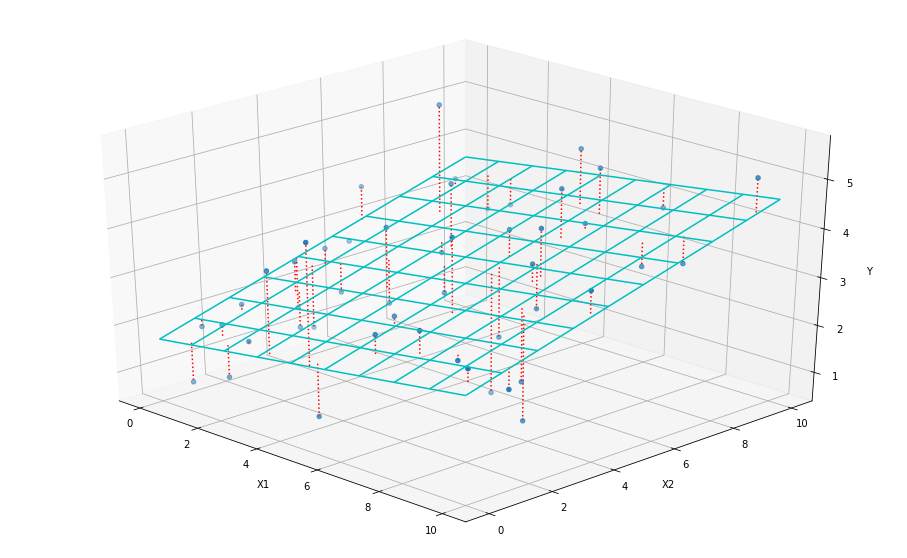

In [58]:
np.random.seed(427)
X1_random = 10*np.random.rand(50)
X2_random = 10*np.random.rand(50)
y_random = 2 + 0.1 * X1_random + 0.1 * X2_random + np.random.normal(0,1,50)
lin2 = linear_model.LinearRegression()
lin2.fit(np.c_[X1_random,X2_random],np.c_[y_random])
X1_random_draw = np.linspace(0,10,10)
X2_random_draw = np.linspace(0,10,10)
X1_draw, X2_draw = np.meshgrid(X1_random_draw, X2_random_draw)
Y_draw = lin2.intercept_[0] + lin2.coef_[0][0]*X1_draw + lin2.coef_[0][1]*X2_draw
y_random_predictions = lin2.predict(np.c_[X1_random,X2_random])
plt.figure(figsize=(16, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(X1_random,X2_random,y_random,'b')
ax.plot_wireframe(X1_draw, X2_draw,Y_draw, color='c')
for i in range(len(y_random)):
    ax.plot3D(np.c_[X1_random[i],X1_random[i]].reshape(2,),np.c_[X2_random[i],X2_random[i]].reshape(2,),
              np.c_[y_random_predictions.reshape(50,)[i],y_random[i]].reshape(2,),"r:")
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.view_init(elev=30,azim=-45)

**TABLE 3.4.statsmodels**

In [59]:
results_total = smf.ols('sales ~ TV + newspaper + radio',data = Advertising).fit()
results_total.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 20 Dec 2019   Prob (F-statistic):           1.58e-96
Time:                        14:30:33   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
radio          0.1885      0.009     21.893      0.000       0.172       0.206
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**TABLE 3.4.scikit-learn**

In [60]:
from numpy.linalg import inv

相关计算说明如下：
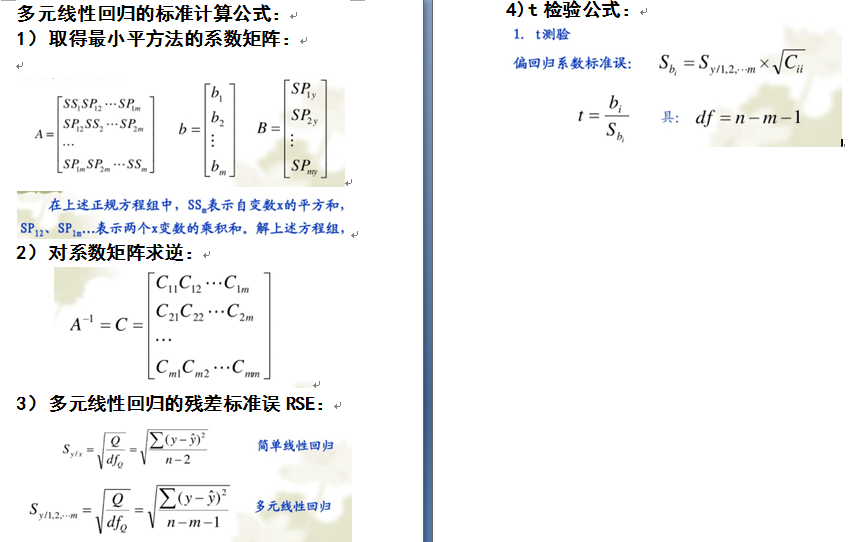

In [61]:
X_total = Advertising[['TV','radio','newspaper']]
lin1_total = linear_model.LinearRegression()
lin1_total.fit(np.c_[X_total], np.c_[y])
p0_total,p1_total,p2_total,p3_total = (lin1_total.intercept_[0], lin1_total.coef_[0][0],lin1_total.coef_[0][1],lin1_total.coef_[0][2])
y_predictions_total = lin1_total.predict(np.c_[X_total])
lin_mse_total = mean_squared_error(np.c_[y], np.c_[y_predictions_total])
lin_rse_total = ((np.c_[y_predictions_total] - np.c_[y])**2).sum()/(len(y)-4)
#std_err_p0_total = (lin_rse_total*(1/len(y)+X_total.mean()**2/((X_total-X_total.mean())**2).sum()))**0.5
#std_err_p1_total = (lin_rse_total/((X_total-X_total.mean())**2).sum())**0.5
#t0_statistic_total = p0_total/std_err_p0_total
#t1_statistic_total = p1_total/std_err_p1_total
SS1 = ((np.c_[X]-np.c_[X].mean())**2).sum()
SS2 = ((np.c_[X_radio]-np.c_[X_radio].mean())**2).sum()
SS3 = ((np.c_[X_newspaper]-np.c_[X_newspaper].mean())**2).sum()
SP12 = ((np.c_[X]-np.c_[X].mean())*(np.c_[X_radio]-np.c_[X_radio].mean())).sum()
SP13 = ((np.c_[X]-np.c_[X].mean())*(np.c_[X_newspaper]-np.c_[X_newspaper].mean())).sum()
SP23 = ((np.c_[X_radio]-np.c_[X_radio].mean())*(np.c_[X_newspaper]-np.c_[X_newspaper].mean())).sum()
A_total = np.array([[SS1,SP12,SP13],[SP12,SS2,SP13],[SP13,SP23,SS3]])
A_inv = inv(A_total)
C11 = A_inv[0,0]
C22 = A_inv[1,1]
C33 = A_inv[2,2]
'''
缺少正确公式
std_err_p0_total = (lin_rse_total * (1/len(y) + (np.c_[X].mean() ** 2 + np.c_[X_radio].mean() ** 2 
                                                 +np.c_[X_newspaper].mean() ** 2)*(C11+C22+C33)))** 0.5
t0_statistic_total = p0_total / std_err_p0_total
'''
std_err_p0_total = '???'
t0_statistic_total = '???'
std_err_p1_total = (lin_rse_total * C11) ** 0.5
t1_statistic_total = p1_total / std_err_p1_total
std_err_p2_total = (lin_rse_total * C22) ** 0.5
t2_statistic_total = p2_total / std_err_p2_total
std_err_p3_total = (lin_rse_total * C33) ** 0.5
t3_statistic_total = p3_total / std_err_p3_total
print('const  coef:' + str(p0_total) + '  std err:' + str(std_err_p0_total) + '  t:' + str(t0_statistic_total))
print('TV  coef:' + str(p1_total) + '  std err:' + str(std_err_p1_total) + '  t:' + str(t1_statistic_total))
print('radio  coef:' + str(p2_total) + '  std err:' + str(std_err_p2_total) + '  t:' + str(t2_statistic_total))
print('newspaper  coef:' + str(p3_total) + '  std err:' + str(std_err_p3_total) + '  t:' + str(t3_statistic_total))

const  coef:2.938889369459412  std err:???  t:???
TV  coef:0.0457646454553976  std err:0.0013949279177345355  t:32.80789270439344
radio  coef:0.18853001691820442  std err:0.00856555079561407  t:22.010261968762116
newspaper  coef:-0.0010374930424763285  std err:0.005839863548547247  t:-0.17765706918519017


In [62]:
#p3_statistic_total = (1 - stats.t.cdf(abs(t3_statistic_total),df)) * 2
p3_statistic_total = stats.t.sf(abs(t3_statistic_total),df) * 2
p3_statistic_total

0.8591739198296562

In [63]:
#(1-stats.norm.cdf(abs(t3_statistic_total)))*2
stats.norm.sf(abs(t3_statistic_total))*2

0.8589923026364762

**TABLE 3.5.**

In [64]:
Advertising[['TV','radio','newspaper','sales']].corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


**3.2.2 Some Important Questions**

**TABLE 3.6.statsmodels**

In [65]:
results_total.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 20 Dec 2019   Prob (F-statistic):           1.58e-96
Time:                        14:30:33   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
radio          0.1885      0.009     21.893      0.000       0.172       0.206
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
results_total.mse_resid

2.8409452188887094

In [67]:
results_total.mse_resid ** 0.5

1.6855103734147439

**TABLE 3.6.scikit-learn**

In [68]:
#对应于RSE =（RSS/(n − p - 1)）^0.5即 residual standard error残差标准误，区别于MSE（the mean squared error 均方误差）
lin_rse_total = ((np.c_[y_predictions_total] - np.c_[y])**2).sum()/(len(y)-4)
lin_rse_total ** 0.5

1.685510373414744

In [69]:
# 通过sklearn模块直接计算R2统计量
lin_r2_total = r2_score(np.c_[y], np.c_[y_predictions_total])
lin_r2_total

0.8972106381789522

In [70]:
# 公式3.17计算R2统计量 1-RSS/TSS
RSS = ((np.c_[y] - np.c_[y_predictions_total])**2).sum()
TSS = ((np.c_[y] - np.c_[y].mean())**2).sum()
lin_r2_calculate_total = 1 - RSS/TSS
lin_r2_calculate_total

0.8972106381789522

In [71]:
# 公式计算F统计量  ((TSS - RSS)/p) / (RSS/(n-p-1)) 
p = 3
n = 200
lin_f_total = ((TSS - RSS)/p)/(RSS/(n-p-1))
lin_f_total

570.2707036590942

**FIGURE 3.5.**

In [72]:
Advertising.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


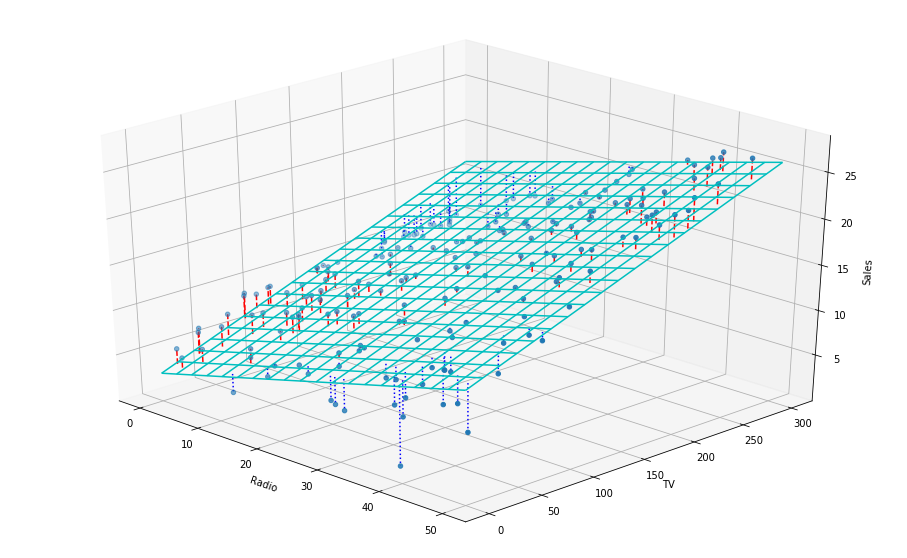

In [73]:
X_radio = Advertising['radio']
X_TV = Advertising['TV']
lin_TV_and_radio = linear_model.LinearRegression()
lin_TV_and_radio.fit(np.c_[X_radio,X_TV],np.c_[y])
Radio_axis_draw = np.linspace(0,50,20)
TV_axis_draw = np.linspace(0,300,20)
Radio_axis, TV_axis = np.meshgrid(Radio_axis_draw, TV_axis_draw)
sales_draw = lin_TV_and_radio.intercept_[0] + lin_TV_and_radio.coef_[0][0]*Radio_axis + lin_TV_and_radio.coef_[0][1]*TV_axis
y_TV_and_radio_predictions = lin_TV_and_radio.predict(np.c_[X_radio,X_TV])
plt.figure(figsize=(16, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(X_radio,X_TV,y,'b')
ax.plot_wireframe(Radio_axis, TV_axis,sales_draw, color='c')
for i in range(len(y)):
    if y_TV_and_radio_predictions.reshape(len(y),)[i] > y[i]:
        ax.plot3D(np.c_[X_radio[i],X_radio[i]].reshape(2,),np.c_[X_TV[i],X_TV[i]].reshape(2,),
                  np.c_[y_TV_and_radio_predictions.reshape(len(y),)[i],y[i]].reshape(2,),"b:")
    else:
        ax.plot3D(np.c_[X_radio[i],X_radio[i]].reshape(2,),np.c_[X_TV[i],X_TV[i]].reshape(2,),
                  np.c_[y_TV_and_radio_predictions.reshape(len(y),)[i],y[i]].reshape(2,),"r--")
ax.set_xlabel('Radio')
ax.set_ylabel('TV')
ax.set_zlabel('Sales')
ax.view_init(elev=30,azim=-45)

# 3.3 Other Considerations in the Regression Model

**3.3.1 Qualitative Predictors**

In [74]:
Credit = pd.read_csv("data/Credit.csv")

In [75]:
from pandas.plotting import scatter_matrix

**FIGURE 3.6.**

In [76]:
Credit.describe()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,200.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,300.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,400.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [77]:
Credit_Renew = Credit[['Balance','Age','Cards','Education','Income','Limit','Rating','Gender','Ethnicity','Student','Married']]

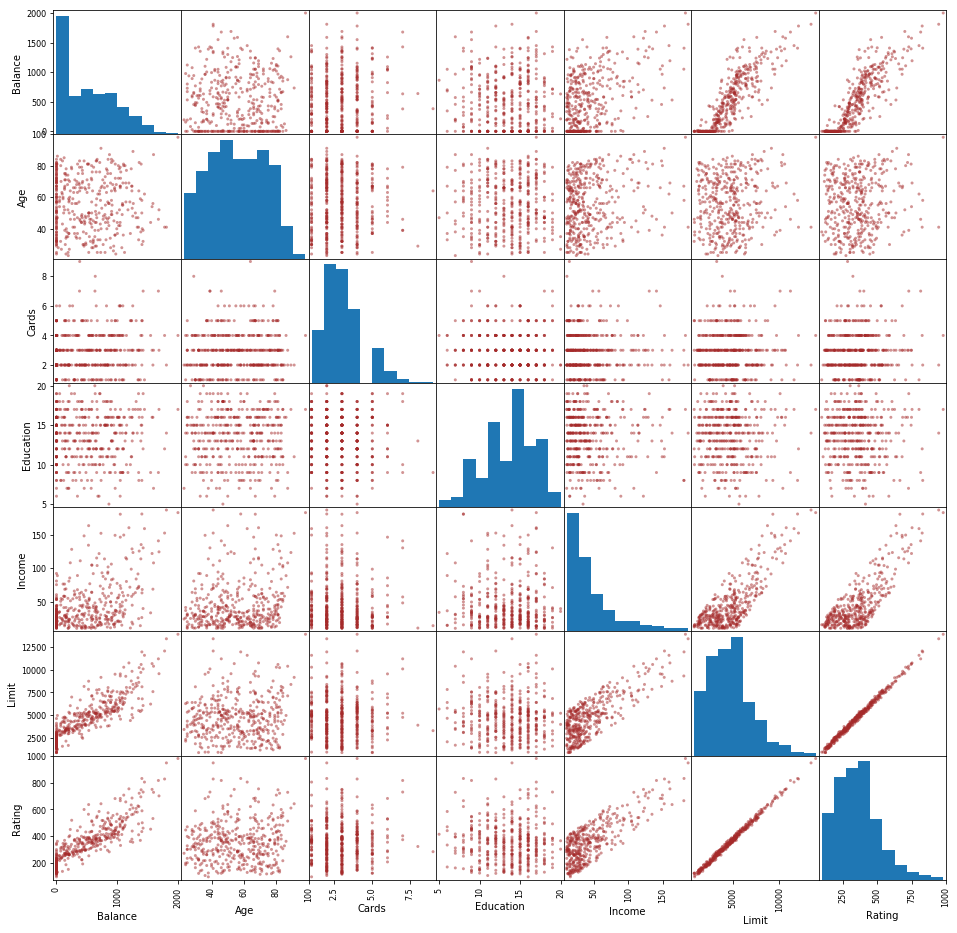

In [78]:
scatter_matrix(Credit_Renew, color="brown",figsize=(16, 16))
plt.grid(linestyle='')

In [79]:
Credit_Renew['Ethnicity'].value_counts()

Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64

**将定性预测变量变为哑变量(dummy variable)**

In [80]:
#使用pd.get_dummies实现哑变量转换
attributes = ["Gender",
              "Ethnicity",
              "Student",
              "Married"]
Credit_Dummy = Credit_Renew
for key_title in attributes:
    dummies = pd.get_dummies(Credit_Renew[key_title], prefix=key_title)
    Credit_Dummy = Credit_Dummy.join(dummies).drop(key_title,axis=1)

In [81]:
Credit_Dummy.head()

,Balance,Age,Cards,Education,Income,Limit,Rating,Gender_Female,Gender_Male,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian,Student_No,Student_Yes,Married_No,Married_Yes
0,333,34,2,11,14.891,3606,283,0,1,0,0,1,1,0,0,1
1,903,82,3,15,106.025,6645,483,1,0,0,1,0,0,1,0,1
2,580,71,4,11,104.593,7075,514,0,1,0,1,0,1,0,1,0
3,964,36,3,11,148.924,9504,681,1,0,0,1,0,1,0,1,0
4,331,68,2,16,55.882,4897,357,0,1,0,0,1,1,0,0,1


In [82]:
#使用sklearn的factorize() 方法实现哑变量转换(不太适用于该书，因为Ethnicity哑变量为0、1、2，而不是按内容分列为0、1)
attributes = ["Gender",
              "Ethnicity",
              "Student",
              "Married"]
Credit_Dummy_encoded = [0,0,0,0]
Credit_Dummy_categories = [0,0,0,0]
Credit_Dummy_sklearn = Credit_Renew
for key_num in range(4):
    key_title = attributes[key_num]
    Credit_Dummy_encoded[key_num], Credit_Dummy_categories[key_num] = Credit_Renew[key_title].factorize()
    dummies = pd.DataFrame(Credit_Dummy_encoded[key_num],columns=[key_title])
    Credit_Dummy_sklearn = Credit_Dummy_sklearn.drop(key_title,axis=1).join(dummies)
   #Credit_Dummy_sklearn.loc[:,key_title] = Credit_Dummy_encoded[key_num]

In [83]:
Credit_Dummy_sklearn.head()

,Balance,Age,Cards,Education,Income,Limit,Rating,Gender,Ethnicity,Student,Married
0,333,34,2,11,14.891,3606,283,0,0,0,0
1,903,82,3,15,106.025,6645,483,1,1,1,0
2,580,71,4,11,104.593,7075,514,0,1,0,1
3,964,36,3,11,148.924,9504,681,1,1,0,1
4,331,68,2,16,55.882,4897,357,0,0,0,0


In [84]:
Credit_Dummy_categories

[Index(['Male', 'Female'], dtype='object'),
 Index(['Caucasian', 'Asian', 'African American'], dtype='object'),
 Index(['No', 'Yes'], dtype='object'),
 Index(['Yes', 'No'], dtype='object')]

In [85]:
#使用sklearn的 OneHotEncoder类实现哑变量转换(实际变成了稀疏矩阵，也不适用于本书案例展示）
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
Credit_Dummy_1hot = [0,0,0,0]
for key_num in range(4):
    Credit_Dummy_1hot[key_num] = encoder.fit_transform(Credit_Dummy_encoded[key_num].reshape(-1,1))

c:\users\wujiaxu\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\wujiaxu\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence thi

In [86]:
Credit_Dummy_1hot[0]

<400x2 sparse matrix of type '<class 'numpy.float64'>'
	with 400 stored elements in Compressed Sparse Row format>

In [87]:
Credit_Dummy_1hot[1].toarray()[:5]

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

**TABLE 3.7.**

In [88]:
results_gender = smf.ols('Balance~Gender_Female',data = Credit_Dummy).fit()
results_gender.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1836
Date:                Fri, 20 Dec 2019   Prob (F-statistic):              0.669
Time:                        14:30:39   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       509.8031     33.128     15.389      0.000     444.675     574.931
Gender_Female    19.7331     46.051      0.429      0.669     -70.801     110.267
==============================================================================
Omnibus:                       28.438   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.346
Skew:                           0.583   Prob(JB):                     1.15e-06
Kurtosis:                       2.471   Cond. No.                         2.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
#备注：也可以使用patsy模型直接实现哑变量转换，与上面比较（注意部分变量的变化）
results_gender = smf.ols('Balance~Gender',data = Credit).fit()
results_gender.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1836
Date:                Fri, 20 Dec 2019   Prob (F-statistic):              0.669
Time:                        14:30:39   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        529.5362     31.988     16.554      0.000     466.649     592.423
Gender[T.Male]   -19.7331     46.051     -0.429      0.669    -110.267      70.801
==============================================================================
Omnibus:                       28.438   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.346
Skew:                           0.583   Prob(JB):                     1.15e-06
Kurtosis:                       2.471   Cond. No.                         2.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**TABLE 3.8.**

In [90]:
results_Ethnicity = smf.ols('Balance~ Ethnicity_Asian + Ethnicity_Caucasian',data = Credit_Dummy).fit()
results_Ethnicity.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.04344
Date:                Fri, 20 Dec 2019   Prob (F-statistic):              0.957
Time:                        14:30:40   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6045.
Df Residuals:                     397   BIC:                             6057.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             531.0000     46.319     11.464      0.000     439.939     622.061
Ethnicity_Asian       -18.6863     65.021     -0.287      0.774    -146.515     109.142
Ethnicity_Caucasian   -12.5025     56.681     -0.221      0.826    -123.935      98.930
==============================================================================
Omnibus:                       28.829   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.395
Skew:                           0.581   Prob(JB):                     1.13e-06
Kurtosis:                       2.460   Cond. No.                         4.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
#备注：也可以使用patsy模型直接实现哑变量转换，与上面比较（注意部分变量的变化）
results_Ethnicity = smf.ols('Balance~ Ethnicity',data = Credit).fit()
results_Ethnicity.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.04344
Date:                Fri, 20 Dec 2019   Prob (F-statistic):              0.957
Time:                        14:30:40   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6045.
Df Residuals:                     397   BIC:                             6057.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                531.0000     46.319     11.464      0.000     439.939     622.061
Ethnicity[T.Asian]       -18.6863     65.021     -0.287      0.774    -146.515     109.142
Ethnicity[T.Caucasian]   -12.5025     56.681     -0.221      0.826    -123.935      98.930
==============================================================================
Omnibus:                       28.829   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.395
Skew:                           0.581   Prob(JB):                     1.13e-06
Kurtosis:                       2.460   Cond. No.                         4.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**3.3.2 Extensions of the Linear Model**

**TABLE 3.9.statsmodels**

In [92]:
#利用statsmodels实现表3-9
results_Trp = smf.ols('sales~ TV * radio',data = Advertising).fit()
results_Trp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Fri, 20 Dec 2019   Prob (F-statistic):          6.68e-146
Time:                        14:30:40   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**FIGURE 3.7.**

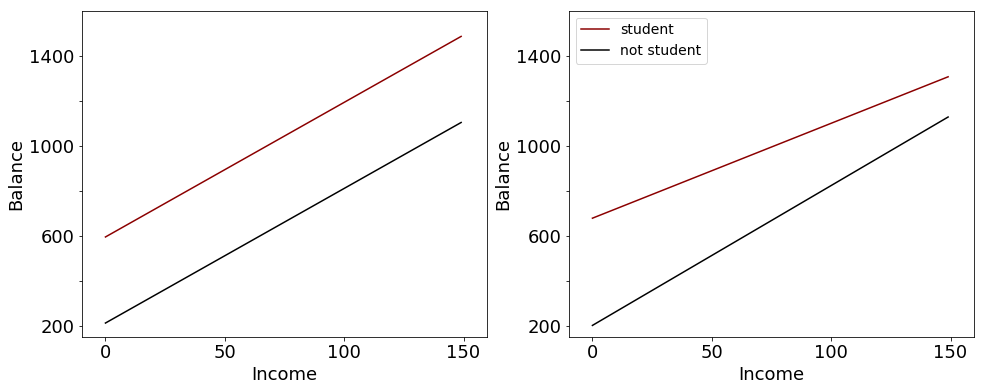

In [93]:
import patsy
#没有交互项的模型
y_balance,X_nointer = patsy.dmatrices('Balance ~ 0 + Income + Student_Yes', data = Credit_Dummy)
y_balance,X_inter = patsy.dmatrices('Balance ~ 0 + Income * Student_Yes', data = Credit_Dummy)
#使用sklearn进行两种情况下的线性回归
lin1_nointer = linear_model.LinearRegression()
lin1_nointer.fit(np.c_[X_nointer],np.c_[y_balance])
lin1_inter = linear_model.LinearRegression()
lin1_inter.fit(np.c_[X_inter],np.c_[y_balance])
#绘图
plt.figure(figsize=(16, 6))
Income_range = list(range(0,150,1))
#不含交互项目图
plt.subplot(121)
X_income_student = np.c_[Income_range,[1] * 150]
X_income_not_student = np.c_[Income_range,[0] * 150]
y_balance_student_predict = lin1_nointer.predict(X_income_student)
y_balance_not_student_predict = lin1_nointer.predict(X_income_not_student)
plt.plot(Income_range,y_balance_student_predict, "darkred",label = 'student')
plt.plot(Income_range,y_balance_not_student_predict, "black",label = 'not student')
plt.xlabel("Income", fontsize=18)
plt.ylabel("Balance", fontsize=18)
plt.xlim(-10, 160)
plt.ylim(150, 1600)
plt.xticks((0, 50, 100, 150), color='k', size=18)
plt.yticks(np.arange(200,1600, step=200),list(x* 200 if x%2 == 1 else '' for x in range(1,8)),color='k', size=18)
#含交互项目图
plt.subplot(122)
X_income_student = np.c_[Income_range,[1] * 150,Income_range]
X_income_not_student = np.c_[Income_range,[0] * 150,[0] * 150]
y_balance_student_predict = lin1_inter.predict(X_income_student)
y_balance_not_student_predict = lin1_inter.predict(X_income_not_student)
plt.plot(Income_range,y_balance_student_predict, "darkred",label = 'student')
plt.plot(Income_range,y_balance_not_student_predict, "black",label = 'not student')
plt.legend(loc="upper left", fontsize=14) 
plt.xlabel("Income", fontsize=18)
plt.ylabel("Balance", fontsize=18)
plt.xlim(-10, 160)
plt.ylim(150, 1600)
plt.xticks((0, 50, 100, 150), color='k', size=18)
plt.yticks(np.arange(200,1600, step=200),list(x* 200 if x%2 == 1 else '' for x in range(1,8)),color='k', size=18)
pass

**TABLE 3.10.**

In [94]:
Auto = pd.read_csv('Data/Auto.csv', na_values='?').dropna()
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


**从之前的演示可以看出statsmodels得出一些统计评估数据更适宜，故使用statsmodels得出相关统计数据**

In [95]:
results_horsepower_degree_2 = smf.ols('mpg ~ horsepower + I(horsepower ** 2)',data = Auto).fit()
results_horsepower_degree_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Fri, 20 Dec 2019   Prob (F-statistic):           5.40e-99
Time:                        14:30:40   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             56.9001      1.800     31.604      0.000      53.360      60.440
horsepower            -0.4662      0.031    -14.978      0.000      -0.527      -0.405
I(horsepower ** 2)     0.0012      0.000     10.080      0.000       0.001       0.001
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                     1.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**FIGURE 3.8.**

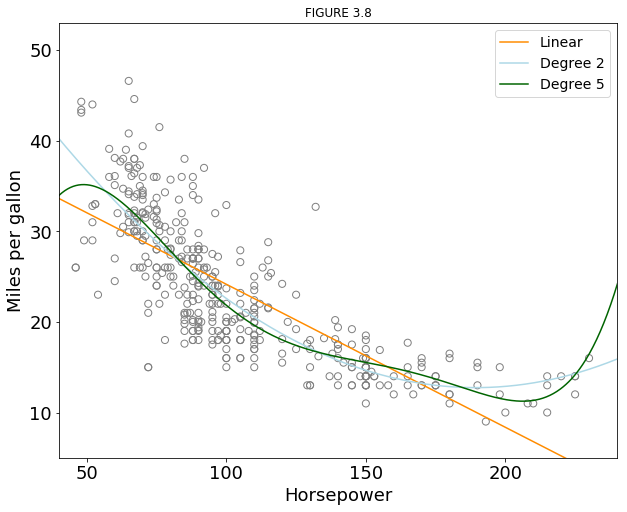

In [96]:
from sklearn.preprocessing import PolynomialFeatures
y_mpg = Auto['mpg']
poly_features_2 = PolynomialFeatures(degree=2,include_bias=False)
poly_features_5 = PolynomialFeatures(degree=5,include_bias=False)
X_horsepower = np.c_[Auto['horsepower']]
X_horsepower_d2 = poly_features_2.fit_transform(X_horsepower)
X_horsepower_d5 = poly_features_5.fit_transform(X_horsepower)
lin_reg_horsepower = linear_model.LinearRegression()
lin_reg_horsepower_d2 = linear_model.LinearRegression()
lin_reg_horsepower_d5 = linear_model.LinearRegression()
lin_reg_horsepower.fit(X_horsepower,y_mpg)
lin_reg_horsepower_d2.fit(X_horsepower_d2,y_mpg)
lin_reg_horsepower_d5.fit(X_horsepower_d5,y_mpg)
X_new = np.linspace(0, 250, 1000).reshape(1000, 1)
y_new_predict = lin_reg_horsepower.predict(X_new)
X_new_d2 = poly_features_2.fit_transform(X_new)
X_new_d5 = poly_features_5.fit_transform(X_new)
y_new_predict_d2 = lin_reg_horsepower_d2.predict(X_new_d2)
y_new_predict_d5 = lin_reg_horsepower_d5.predict(X_new_d5)
#绘图
plt.figure(figsize=(10, 8))
plt.plot(X_new,y_new_predict, "darkorange",label = 'Linear')
plt.plot(X_new,y_new_predict_d2, "lightblue",label = 'Degree 2')
plt.plot(X_new,y_new_predict_d5, "darkgreen",label = 'Degree 5')
plt.legend(loc="upper right", fontsize=14) 
plt.scatter(X_horsepower,y_mpg,color='', marker='o', edgecolors='gray', s=50)
plt.xlabel("Horsepower", fontsize=18)
plt.ylabel("Miles per gallon", fontsize=18)
plt.xlim(40, 240)
plt.ylim(5, 53)
plt.xticks((50, 100, 150, 200), color='k', size=18)
plt.yticks((10, 20, 30, 40, 50),color='k', size=18)
plt.title('FIGURE 3.8')
plt.show()

**3.3.3 Potential Problems**

**FIGURE 3.9.**

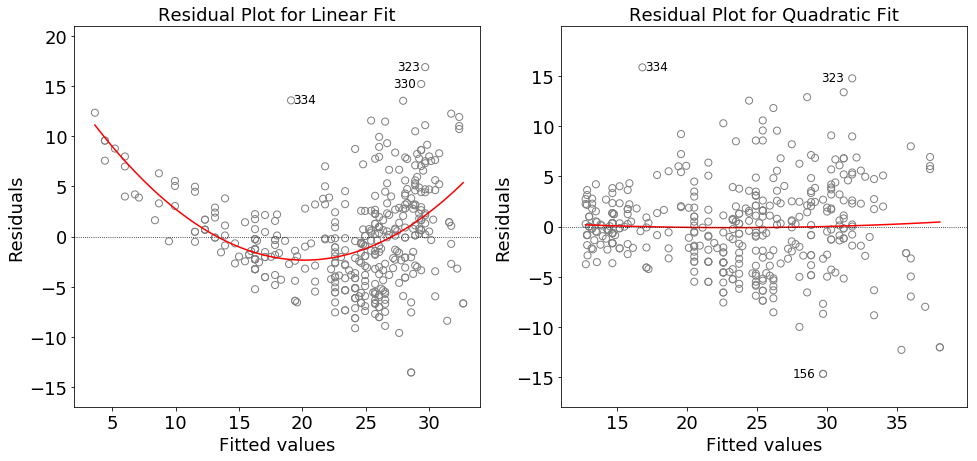

In [97]:
#y_mpg_predict转换为pd.Series,便于后面的点转换为标签
y_mpg_predict = pd.Series(lin_reg_horsepower.predict(X_horsepower),index = y_mpg.index)
y_mpg_predict_d2 = pd.Series(lin_reg_horsepower_d2.predict(X_horsepower_d2),index = y_mpg.index)
y_mpg_Residuals = y_mpg - y_mpg_predict
y_mpg_Residuals_d2 = y_mpg - y_mpg_predict_d2
lin_reg_Residuals = linear_model.LinearRegression()
lin_reg_Residuals_d2 = linear_model.LinearRegression()
#进行2次多项式拟合（不知道原书是怎么拟合的，不过光滑曲线原理应该差不多）
y_mpg_predict_poly = poly_features_2.fit_transform(np.c_[y_mpg_predict])
y_mpg_predict_d2_poly = poly_features_2.fit_transform(np.c_[y_mpg_predict_d2])
lin_reg_Residuals.fit(np.c_[y_mpg_predict_poly],np.c_[y_mpg_Residuals])
lin_reg_Residuals_d2.fit(np.c_[y_mpg_predict_d2_poly],np.c_[y_mpg_Residuals_d2])
X_new = np.linspace(y_mpg_predict.min(), y_mpg_predict.max(), 100).reshape(100, 1)
X_new_d2 = np.linspace(y_mpg_predict_d2.min(), y_mpg_predict_d2.max(), 100).reshape(100, 1)
X_new_poly = poly_features_2.fit_transform(X_new)
X_new_d2_poly = poly_features_2.fit_transform(X_new_d2)
y_new_predict = lin_reg_Residuals.predict(X_new_poly)
y_new_predict_d2 = lin_reg_Residuals_d2.predict(X_new_d2_poly)
#绘图
plt.figure(figsize=(16, 7))
#左图
plt.subplot(121)
plt.plot(X_new,y_new_predict, "red")
plt.scatter(y_mpg_predict,y_mpg_Residuals,color='', marker='o', edgecolors='gray', s=50)
plt.xlabel("Fitted values", fontsize=18)
plt.ylabel("Residuals", fontsize=18)
plt.xlim(2, 34)
plt.ylim(-17, 21)
plt.xticks(np.arange(5,31, step=5), color='k', size=18)
plt.yticks(np.arange(-15,21, step=5),color='k', size=18)
plt.axhline(y=0,linewidth= 0.8,color = 'black',linestyle=':' )
#增加图中部分点的标签
tap_1,tap_2,tap_3 = np.abs(y_mpg_Residuals).sort_values(ascending=False).index[:3]+1
plt.text(y_mpg_predict[tap_1 - 1] -2.2, y_mpg_Residuals[tap_1 - 1]-0.3, str(tap_1), fontsize=12, color="black")
plt.text(y_mpg_predict[tap_2 - 1] -2.2, y_mpg_Residuals[tap_2 - 1]-0.3, str(tap_2), fontsize=12, color="black")
plt.text(y_mpg_predict[tap_3 - 1] + 0.2 , y_mpg_Residuals[tap_3 - 1]-0.3, str(tap_3), fontsize=12, color="black")
plt.title('Residual Plot for Linear Fit', fontsize=18)
#右图
plt.subplot(122)
plt.plot(X_new_d2,y_new_predict_d2, "red")
plt.scatter(y_mpg_predict_d2,y_mpg_Residuals_d2,color='', marker='o', edgecolors='gray', s=50)
plt.xlabel("Fitted values", fontsize=18)
plt.ylabel("Residuals", fontsize=18)
plt.xlim(11, 40)
plt.ylim(-18, 20)
plt.xticks(np.arange(15,36, step=5), color='k', size=18)
plt.yticks(np.arange(-15,16, step=5),color='k', size=18)
plt.axhline(y=0,linewidth= 0.8,color = 'black',linestyle=':' )
#增加图中部分点的标签
tap_4,tap_5,tap_6 = np.abs(y_mpg_Residuals_d2).sort_values(ascending=False).index[:3]+1
plt.text(y_mpg_predict_d2[tap_4 - 1] + 0.2, y_mpg_Residuals_d2[tap_4 - 1] - 0.3, str(tap_4), fontsize=12, color="black")
plt.text(y_mpg_predict_d2[tap_5 - 1] - 2.2, y_mpg_Residuals_d2[tap_5 - 1] - 0.3, str(tap_5), fontsize=12, color="black")
plt.text(y_mpg_predict_d2[tap_6 - 1] - 2.2 , y_mpg_Residuals_d2[tap_6 - 1] - 0.3, str(tap_6), fontsize=12, color="black")
plt.title('Residual Plot for Quadratic Fit', fontsize=18)
plt.show()

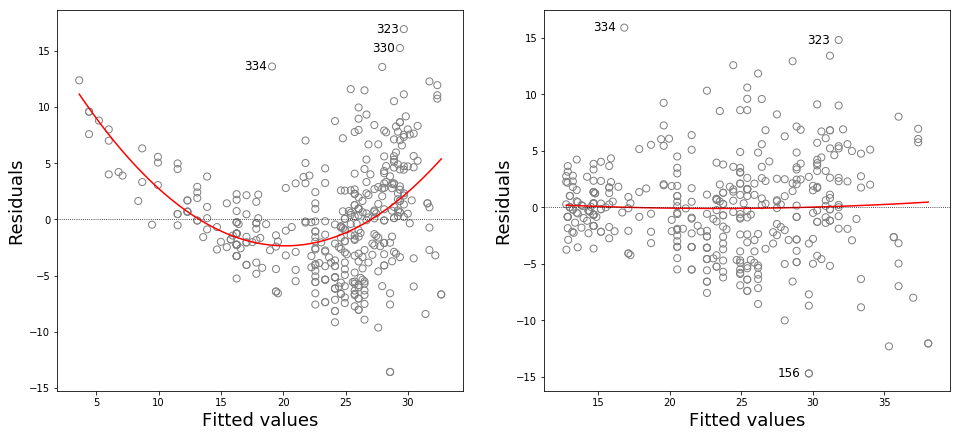

In [98]:
#把上面转换为sklearn的残差图函数编写，便于后面复用
def plot_Residuals(X_in , y_in,degree_in = 1,degree_Residuals = 2,tap_show = False):    
    poly_features_in = PolynomialFeatures(degree = degree_in,include_bias=False)
    X_degree_in = poly_features_in.fit_transform(np.c_[X_in])
    lin_in = linear_model.LinearRegression()
    lin_in.fit(X_degree_in,y_in)
    y_predict = pd.Series(lin_in.predict(X_degree_in ),index = y_in.index)
    y_Residuals = y_in - y_predict
    poly_features_Residuals = PolynomialFeatures(degree = degree_Residuals,include_bias=False)
    y_predict_poly = poly_features_Residuals.fit_transform(np.c_[y_predict])
    lin_Residuals = linear_model.LinearRegression()
    lin_Residuals.fit(np.c_[y_predict_poly],np.c_[y_Residuals])
    X_new = np.linspace(y_predict.min(), y_predict.max(), 100).reshape(100, 1)
    X_new_poly = poly_features_Residuals.fit_transform(X_new)
    y_new_predict = lin_Residuals.predict(X_new_poly)
    plt.plot(X_new,y_new_predict, "red")
    plt.scatter(y_predict,y_Residuals,color='', marker='o', edgecolors='gray', s=50)
    plt.xlabel("Fitted values", fontsize=18)
    plt.ylabel("Residuals", fontsize=18)
    plt.axhline(y=0,linewidth= 0.8,color = 'black',linestyle=':' )
    if tap_show == True:
        tap_1,tap_2,tap_3 = np.abs(y_Residuals).sort_values(ascending=False).index[:3]
        plt.text(y_predict[tap_1] -2.2, y_Residuals[tap_1] - 0.3, str(tap_1 + 1), fontsize=12, color="black")
        plt.text(y_predict[tap_2] -2.2, y_Residuals[tap_2] - 0.3, str(tap_2 + 1), fontsize=12, color="black")
        plt.text(y_predict[tap_3] -2.2 , y_Residuals[tap_3] - 0.3, str(tap_3 + 1), fontsize=12, color="black")   
#绘图
plt.figure(figsize=(16, 7))
#左图
plt.subplot(121)  
plot_Residuals(X_horsepower , y_mpg, tap_show = True)
#右图
plt.subplot(122)  
plot_Residuals(X_horsepower , y_mpg, degree_in = 2,tap_show = True)    

**FIGURE 3.14.**

**直接使用 matplotlib实现**

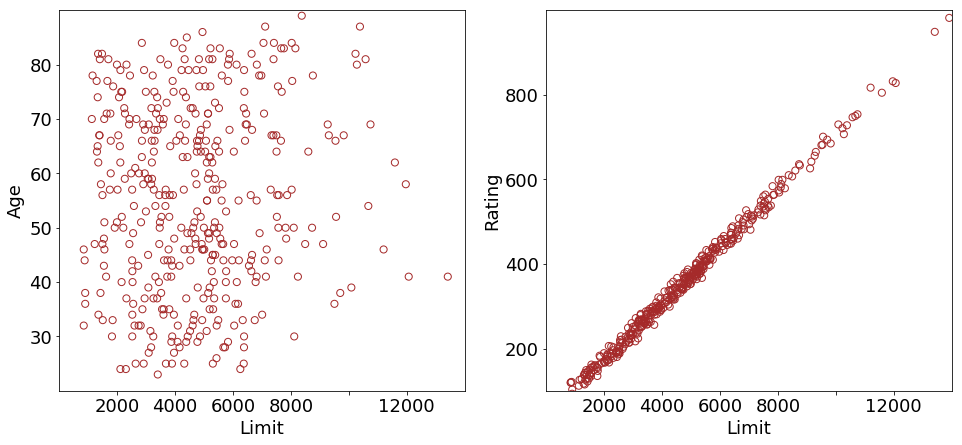

In [99]:
plt.figure(figsize=(16, 7))
#左图
plt.subplot(121)
plt.scatter(Credit_Dummy['Limit'],Credit_Dummy['Age'],color='', marker='o', edgecolors='brown', s=50)
plt.xlabel("Limit", fontsize=18)
plt.ylabel("Age", fontsize=18)
plt.xlim(0, 14000)
plt.ylim(20, 90)
plt.xticks(np.arange(2000,12001, step=2000), (2000,4000,6000,8000,'',12000),color='k', size=18)
plt.yticks(np.arange(30,81, step=10),color='k', size=18)
#右图
plt.subplot(122)
plt.scatter(Credit_Dummy['Limit'],Credit_Dummy['Rating'],color='', marker='o', edgecolors='brown', s=50)
plt.xlabel("Limit", fontsize=18)
plt.ylabel("Rating", fontsize=18)
plt.xlim(0, 14000)
plt.ylim(100, 1000)
plt.xticks(np.arange(2000,12001, step=2000), (2000,4000,6000,8000,'',12000),color='k', size=18)
plt.yticks(np.arange(200,801, step=200),color='k', size=18)
plt.show()

**利用pandas的scatter_matrix**

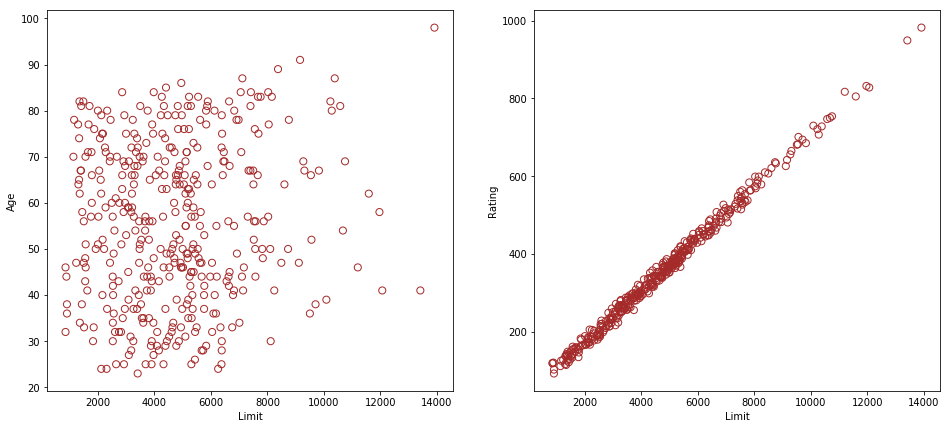

In [100]:
fig = plt.figure(figsize=(16, 7))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
Credit_Dummy.plot(kind="scatter", x="Limit", y="Age",marker='o',s=50,c ='',edgecolors='brown',ax = ax1)
Credit_Dummy.plot(kind="scatter", x="Limit", y="Rating",marker='o',s=50,c ='',edgecolors='brown',ax = ax2)
plt.show()

**FIGURE 3.15.**

In [101]:
from sklearn.preprocessing import scale
y_balance,X_la = patsy.dmatrices('Balance ~ 0 + Limit + Age', data = Credit_Dummy)
y_balance,X_lr = patsy.dmatrices('Balance ~ 0 + Limit + Rating', data = Credit_Dummy)

X_la_scale = scale(X_la,with_std = False)
X_lr_scale = scale(X_lr,with_std = False)

lin = linear_model.LinearRegression()
lin2 = linear_model.LinearRegression()

lin.fit(X_la_scale,y_balance)
lin2.fit(X_lr_scale,y_balance)

p1,p2 = lin.coef_[0][0],lin.coef_[0][1]
P1 = np.linspace(p1 - 0.02,p1 + 0.02,50)
P2 = np.linspace(p2 - 3,p2 + 3,50)

p1_2,p2_2 = lin2.coef_[0][0],lin2.coef_[0][1]
P1_2 = np.linspace(p1_2 - 0.2,p1_2 + 0.2,100)
P2_2 = np.linspace(p2_2 - 3,p2_2 + 3,100)

Z = np.empty((P1.size,P2.size))
P1_grid, P2_grid = np.meshgrid(P1, P2)
for (i,j),v  in np.ndenumerate(Z):
    Z[i,j] =(np.square(y_balance.reshape(400,) - (lin.intercept_[0] +  P1_grid[i,j] * X_la_scale[:,0]
                                   + P2_grid[i,j]* X_la_scale[:,1]))).sum()/1000000

Z_2 = np.empty((P1_2.size,P2_2.size))
P1_grid_2, P2_grid_2 = np.meshgrid(P1_2, P2_2)
for (i,j),v  in np.ndenumerate(Z_2):
    Z_2[i,j] =(np.square(y_balance.reshape(400,) - (lin2.intercept_[0] +  P1_grid_2[i,j] * X_lr_scale[:,0]
                                   + P2_grid_2[i,j]* X_lr_scale[:,1]))).sum()/1000000


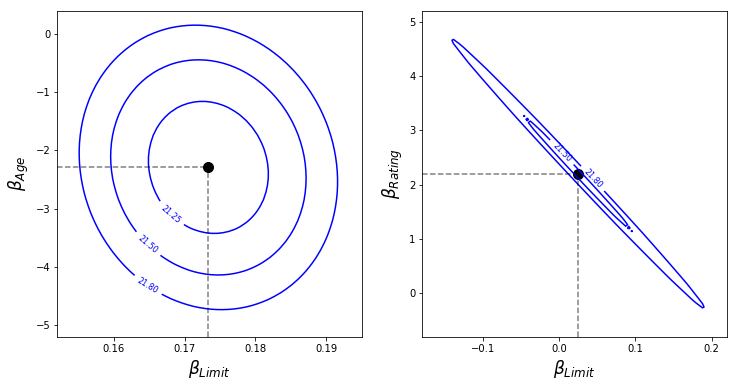

In [102]:
fig = plt.figure(figsize = (12,6))
ax1 = fig.add_subplot(121)
cs = ax1.contour(P1_grid, P2_grid, Z,colors = 'b',levels=[21.25, 21.5, 21.8])
ax1.scatter(p1,p2,c = 'black',s = 100)
ax1.clabel(cs, inline=1, fontsize=8,fmt = '%1.2f')
ax1.plot((0.152,p1),(p2,p2),'--',c = 'black',alpha = 0.5)
ax1.plot((p1,p1),(-5.2,p2),'--',c = 'black',alpha = 0.5)
ax1.set_xlim(0.152,0.195)
ax1.set_ylim(-5.2,0.4)
ax1.set_xticks(np.linspace(0.16,0.19,4))
ax1.set_yticks(np.linspace(-5,0,6))
ax1.set_xlabel(r'$\beta_{Limit}$', fontsize=17)
ax1.set_ylabel(r'$\beta_{Age}$', fontsize=17)

ax2 = fig.add_subplot(122)
cs = ax2.contour(P1_grid_2, P2_grid_2, Z_2,colors = 'b',levels=[21.5, 21.8])
ax2.scatter(p1_2,p2_2,c = 'black',s = 100)
ax2.clabel(cs, inline=1, fontsize=8,fmt = '%1.2f')
ax2.plot((-0.18,p1_2),(p2_2,p2_2),'--',c = 'black',alpha = 0.5)
ax2.plot((p1_2,p1_2),(-0.8,p2_2),'--',c = 'black',alpha = 0.5)
ax2.set_xlim(-0.18,0.22)
ax2.set_ylim(-0.8,5.2)
ax2.set_xticks(np.linspace(-0.1,0.2,4))
ax2.set_yticks(np.linspace(0,5,6))
ax2.set_xlabel(r'$\beta_{Limit}$', fontsize=17)
ax2.set_ylabel(r'$\beta_{Rating}$', fontsize=17)
plt.show()

**TABLE 3.11.**

In [103]:
#X_model_Credit_1 = sm.add_constant(X_Credit_1)
#model_Credit_1 = sm.OLS(y_balance, X_model_Credit_1)
#results_Credit_1 = model_Credit_1.fit()
results_Credit_1 = smf.ols('Balance ~ Limit + Age',data = Credit_Dummy).fit()
results_Credit_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     595.0
Date:                Fri, 20 Dec 2019   Prob (F-statistic):          3.52e-120
Time:                        14:30:44   Log-Likelihood:                -2742.2
No. Observations:                 400   AIC:                             5490.
Df Residuals:                     397   BIC:                             5502.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -173.4109     43.828     -3.957      0.000    -259.576     -87.246
Limit          0.1734      0.005     34.496      0.000       0.163       0.183
Age           -2.2915      0.672     -3.407      0.001      -3.614      -0.969
==============================================================================
Omnibus:                       19.180   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.162
Skew:                           0.382   Prob(JB):                     1.26e-06
Kurtosis:                       4.022   Cond. No.                     2.00e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [104]:
#X_model_Credit_2 = sm.add_constant(X_Credit_2)
#model_Credit_2 = sm.OLS(y_balance, X_model_Credit_2)
#results_Credit_2 = model_Credit_2.fit()
#results_Credit_2.summary()
results_Credit_2 = smf.ols('Balance ~ Limit + Rating',data = Credit_Dummy).fit()
results_Credit_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     582.8
Date:                Fri, 20 Dec 2019   Prob (F-statistic):          7.57e-119
Time:                        14:30:44   Log-Likelihood:                -2745.3
No. Observations:                 400   AIC:                             5497.
Df Residuals:                     397   BIC:                             5509.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -377.5368     45.254     -8.343      0.000    -466.505    -288.569
Limit          0.0245      0.064      0.384      0.701      -0.101       0.150
Rating         2.2017      0.952      2.312      0.021       0.330       4.074
==============================================================================
Omnibus:                       23.153   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.187
Skew:                           0.394   Prob(JB):                     5.10e-09
Kurtosis:                       4.293   Cond. No.                     2.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**共线性VIF的计算方法**

In [105]:
#直接利用statsmodels的variance_inflation_factor实现
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_Credit_3 = Credit_Dummy[['Age','Rating','Limit']]
X_Credit_3 = X_Credit_3.join(pd.DataFrame([1] * X_Credit_3.shape[0],columns = ['intercept']))
#X_Credit_3_m = np.matrix(X_Credit_3)以下同样
#X_Credit_3_m =  np.array(X_Credit_3)以下同样
X_Credit_3_m = np.c_[X_Credit_3]
[variance_inflation_factor(X_Credit_3_m, i) for i in range(X_Credit_3_m.shape[1])]

[1.0113846860681328, 160.66830095856935, 160.59287978597942, 23.80295451367821]

In [106]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_Credit_3_m, i) for i in range(X_Credit_3_m.shape[1])]
vif["features"] = X_Credit_3.columns
vif.round(2)

,VIF Factor,features
0,1.01,Age
1,160.67,Rating
2,160.59,Limit
3,23.80,intercept


In [107]:
#利用sklearn获取的VIF函数编写
def vif_sk(X_pd_frame):
    vif_list = []
    vif_sk = pd.DataFrame()
    for i in range(X_pd_frame.shape[1]):
        lin_vif_sk = linear_model.LinearRegression()
        X_vif_sk = X_pd_frame.drop(X_pd_frame.columns[i],axis=1)
        y_vif_sk = X_pd_frame.iloc[:,i]
        lin_vif_sk.fit(np.c_[X_vif_sk], np.c_[y_vif_sk])
        y_vif_sk_predict = lin_vif_sk.predict(np.c_[X_vif_sk])
        vif_list.append(1/(1-r2_score(np.c_[y_vif_sk], np.c_[y_vif_sk_predict])))
    vif_sk["VIF Factor"] = vif_list
    vif_sk["features"] = X_pd_frame.columns    
    return vif_sk.set_index('features').T
X_Credit_3 = Credit_Dummy[['Age','Rating','Limit']]
vif_sk(X_Credit_3).round(2)

features,Age,Rating,Limit
VIF Factor,1.01,160.67,160.59


**3.4 The Marketing Plan**

In [108]:
#1. Is there a relationship between advertising sales and budget?（即表3-6中的F值）
results_total.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 20 Dec 2019   Prob (F-statistic):           1.58e-96
Time:                        14:30:44   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
radio          0.1885      0.009     21.893      0.000       0.172       0.206
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
#2. How strong is the relationship?（通过RSE及R2进行回答）
print('RSE: ', results_total.mse_resid ** 0.5)
print('R2: ', results_total.rsquared)

RSE:  1.6855103734147439
R2:  0.8972106381789522


#3. Which media contribute to sales?
同#1调用，参考的为p值

In [110]:
#4. How large is the effect of each medium on sales?同#1调用，参考的为coef值、P值及置信区间。增补VIF计算
vif_sk(X_total).round(4)

features,TV,radio,newspaper
VIF Factor,1.0046,1.145,1.1452


In [111]:
#5. How accurately can we predict future sales?（参考#1的置信空间）
#6. Is the relationship linear?（参考图3-5及以下summary()）
#7. Is there synergy among the advertising media?(比较#1的表格R2增加到0.968，TV * radio的P值也很小)
results_Trp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Fri, 20 Dec 2019   Prob (F-statistic):          6.68e-146
Time:                        14:30:44   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

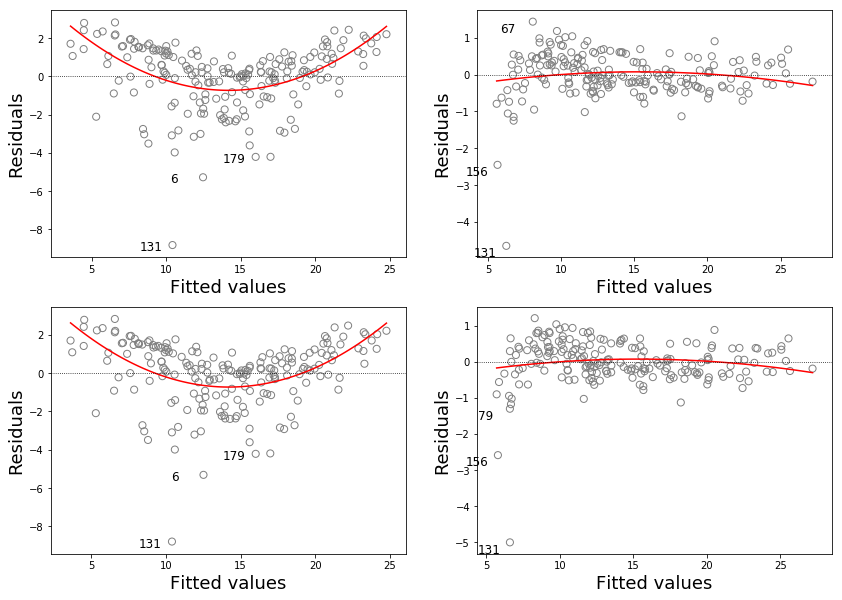

In [112]:
#针对第（6）点提到了残差图对应，比较几个图形可以看出线性回归残差问题
X_TR = Advertising[['TV','radio']]
plt.figure(figsize=(14, 10))
plt.subplot(221)
plot_Residuals(X_total,y,tap_show = True)
plt.subplot(222)
plot_Residuals(X_total,y,degree_in = 2,tap_show = True)
plt.subplot(223)
plot_Residuals(X_TR,y,tap_show = True)
plt.subplot(224)
plot_Residuals(X_TR,y,degree_in = 2,tap_show = True)